In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [355]:
dtrain=pd.read_csv('data_train.csv')
dtrain

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [356]:
dtest=pd.read_csv('data_test.csv')
dtest

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info


In [357]:
# finding the shape of the data
print(dtrain.shape , dtest.shape)

(10683, 11) (2671, 10)


In [358]:
# finding the columns name within the data
print(dtrain.columns,'\n')
print(dtest.columns)

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object') 

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')


In [359]:
# finding the data type of each columns
print('Training data set \n',dtrain.dtypes,'\n')
print('Testing data set \n',dtest.dtypes,'\n')
# it shows that all the are in object format instead of integer/float , so we need to convert the whole data into integer using encoading techniques 

Training data set 
 Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object 

Testing data set 
 Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object 



In [360]:
# finding the missing values in the data 
print(dtrain.isnull().sum(),'\n')
print(dtest.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [361]:
# we have to adding both the train and testing data
fd=pd.concat([dtrain,dtest])
fd

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [362]:
# import label encoder for converting the data types
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
fd.Airline=le.fit_transform(fd.Airline)
fd['Date_of_Journey']=le.fit_transform(fd['Date_of_Journey'])
fd.Source=le.fit_transform(fd.Source)
fd.Destination=le.fit_transform(fd.Destination)
fd.Dep_Time=le.fit_transform(fd.Dep_Time)
fd.Arivel_Time=le.fit_transform(fd.Arrival_Time)
fd.Duration=le.fit_transform(fd.Duration)
fd.Additional_Info=le.fit_transform(fd.Additional_Info)

In [363]:
del(fd['Route'])
del(fd['Arrival_Time'])

In [364]:
fd['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [365]:
# replacing the total stops columns values
fd.Total_Stops[fd.Total_Stops == 'non-stop'] = 0
fd.Total_Stops[fd.Total_Stops == '1 stop'] = 1
fd.Total_Stops[fd.Total_Stops == '2 stops'] = 2
fd.Total_Stops[fd.Total_Stops == '3 stops'] = 3
fd.Total_Stops[fd.Total_Stops == '4 stops'] = 4

In [366]:
# replacing the missing values present in the  price data
fd['Price'].fillna(fd['Price'].median(),inplace=True)
fd['Total_Stops'].fillna(fd['Total_Stops'].median(),inplace=True)

In [367]:
# finding the flight data set
fd

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24,0,5,211,242,0.0,8,3897.0
1,1,6,3,0,31,342,2.0,8,7662.0
2,4,43,2,1,70,106,2.0,8,13882.0
3,3,10,3,0,164,317,1.0,8,6218.0
4,3,0,0,5,149,309,1.0,8,13302.0
...,...,...,...,...,...,...,...,...,...
2666,1,39,3,0,190,168,1.0,8,8372.0
2667,3,28,3,0,122,239,0.0,8,8372.0
2668,4,36,2,1,205,332,1.0,8,8372.0
2669,1,36,2,1,16,62,1.0,8,8372.0


In [368]:
# finding the null value within the data set
fd.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

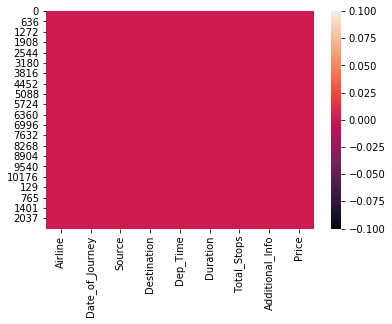

In [369]:
# it shows that there is no missing values present in the data set
sns.heatmap(fd.isnull())

In [370]:
# finding the statistical description of the data
fd.describe()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
count,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000
mean,3.977086,23.720608,1.954096,1.435450,108.254381,195.868129,0.826045,7.407743,8944.040587
std,2.363997,12.377232,1.178607,1.473368,61.034880,111.141733,0.674608,1.198393,4134.354978
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,14.000000,2.000000,0.000000,55.000000,103.000000,0.000000,8.000000,6135.250000
50%,4.000000,24.000000,2.000000,1.000000,97.000000,235.000000,1.000000,8.000000,8372.000000
75%,4.000000,35.000000,3.000000,2.000000,164.000000,284.000000,1.000000,8.000000,11087.000000
max,11.000000,43.000000,4.000000,5.000000,222.000000,373.000000,4.000000,9.000000,79512.000000


In [371]:
# finding the coorealtion of the data
fd.corr()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
Airline,1.000000,0.021171,-0.018547,0.022130,-0.030363,0.028354,-0.206350,-0.058533,-0.035739
Date_of_Journey,0.021171,1.000000,0.163327,-0.270748,-0.011017,-0.002389,0.056505,0.013295,-0.032695
Source,-0.018547,0.163327,1.000000,-0.589710,0.054033,-0.185234,0.191144,-0.022219,0.014042
Destination,0.022130,-0.270748,-0.589710,1.000000,-0.058119,0.012843,-0.294183,0.027398,-0.063450
Dep_Time,-0.030363,-0.011017,0.054033,-0.058119,1.000000,0.046499,-0.075771,-0.056115,0.002138
Duration,0.028354,-0.002389,-0.185234,0.012843,0.046499,1.000000,-0.170563,0.074230,-0.124747
Total_Stops,-0.206350,0.056505,0.191144,-0.294183,-0.075771,-0.170563,1.000000,-0.079092,0.538920
Additional_Info,-0.058533,0.013295,-0.022219,0.027398,-0.056115,0.074230,-0.079092,1.000000,-0.060891
Price,-0.035739,-0.032695,0.014042,-0.063450,0.002138,-0.124747,0.538920,-0.060891,1.000000


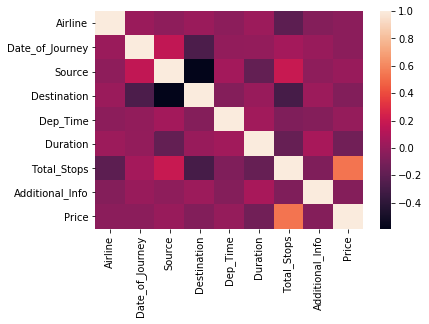

In [372]:
# analysis of coorelation of data
sns.heatmap(fd.corr())

# Analysing the data through various method

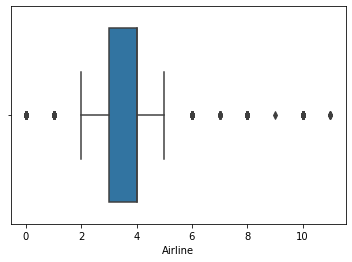

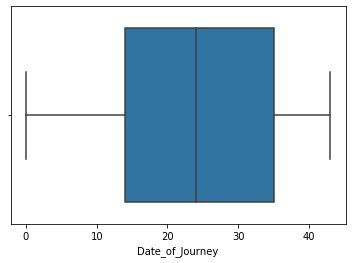

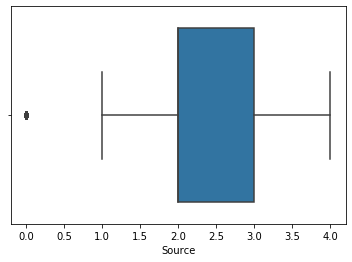

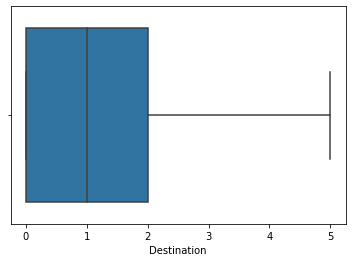

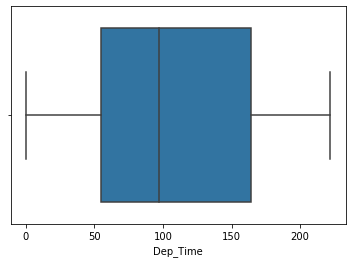

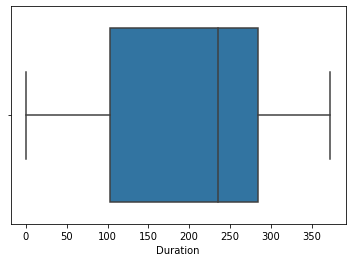

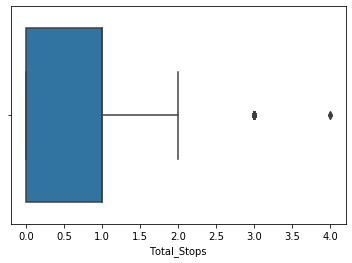

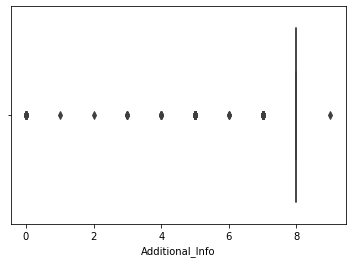

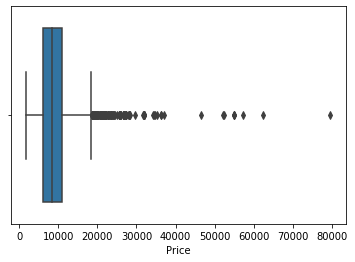

In [373]:
# finding the outliers present in the data set
for i in fd.describe().columns:
    sns.boxplot(fd[i].dropna())
    plt.show()  # it show that there are many outliers are present in the data

# finding the destribution of skewness in the data


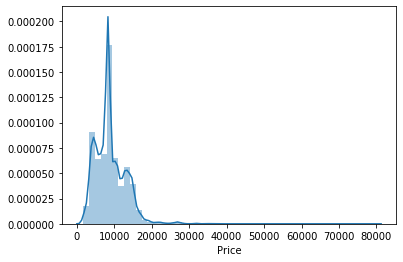

In [374]:
sns.distplot(fd['Price'])

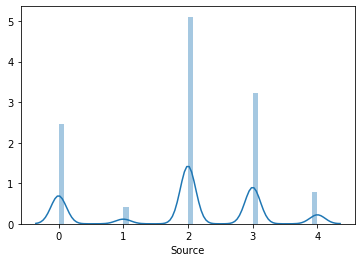

In [375]:
sns.distplot(fd['Source'])

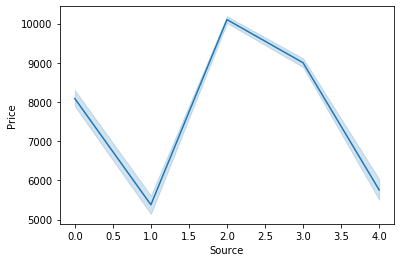

In [376]:
sns.lineplot(x='Source',y='Price',data=fd)

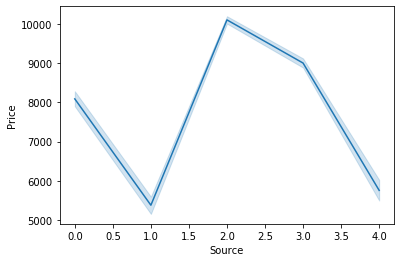

In [377]:
sns.lineplot(x='Source',y='Price',data=fd)

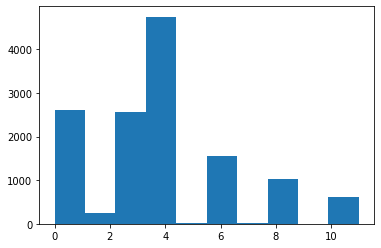

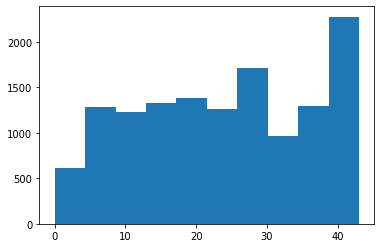

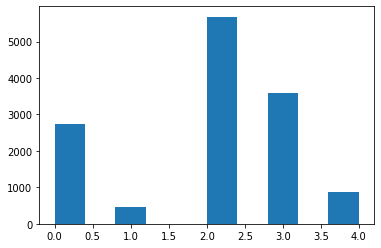

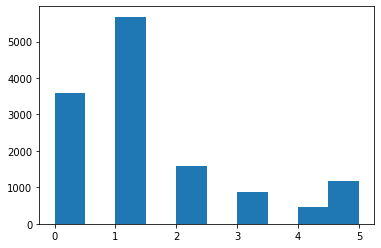

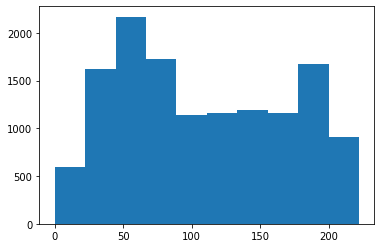

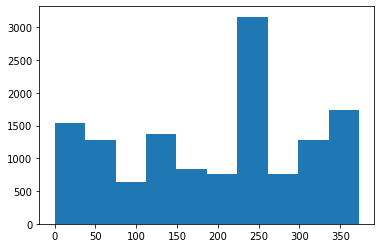

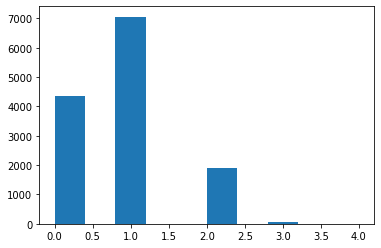

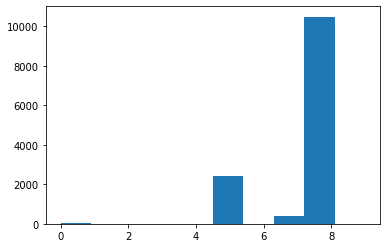

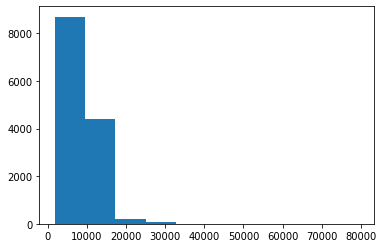

In [378]:
for i in fd.describe().columns:
    plt.hist(fd[i].dropna())
    plt.show()

In [379]:
# finding the data type of each columns
fd.dtypes
# we need to change the data type of Total_Stops column

Airline              int32
Date_of_Journey      int32
Source               int32
Destination          int32
Dep_Time             int32
Duration             int32
Total_Stops        float64
Additional_Info      int32
Price              float64
dtype: object

In [380]:
fd['Total_Stops']=fd['Total_Stops'].astype(float)

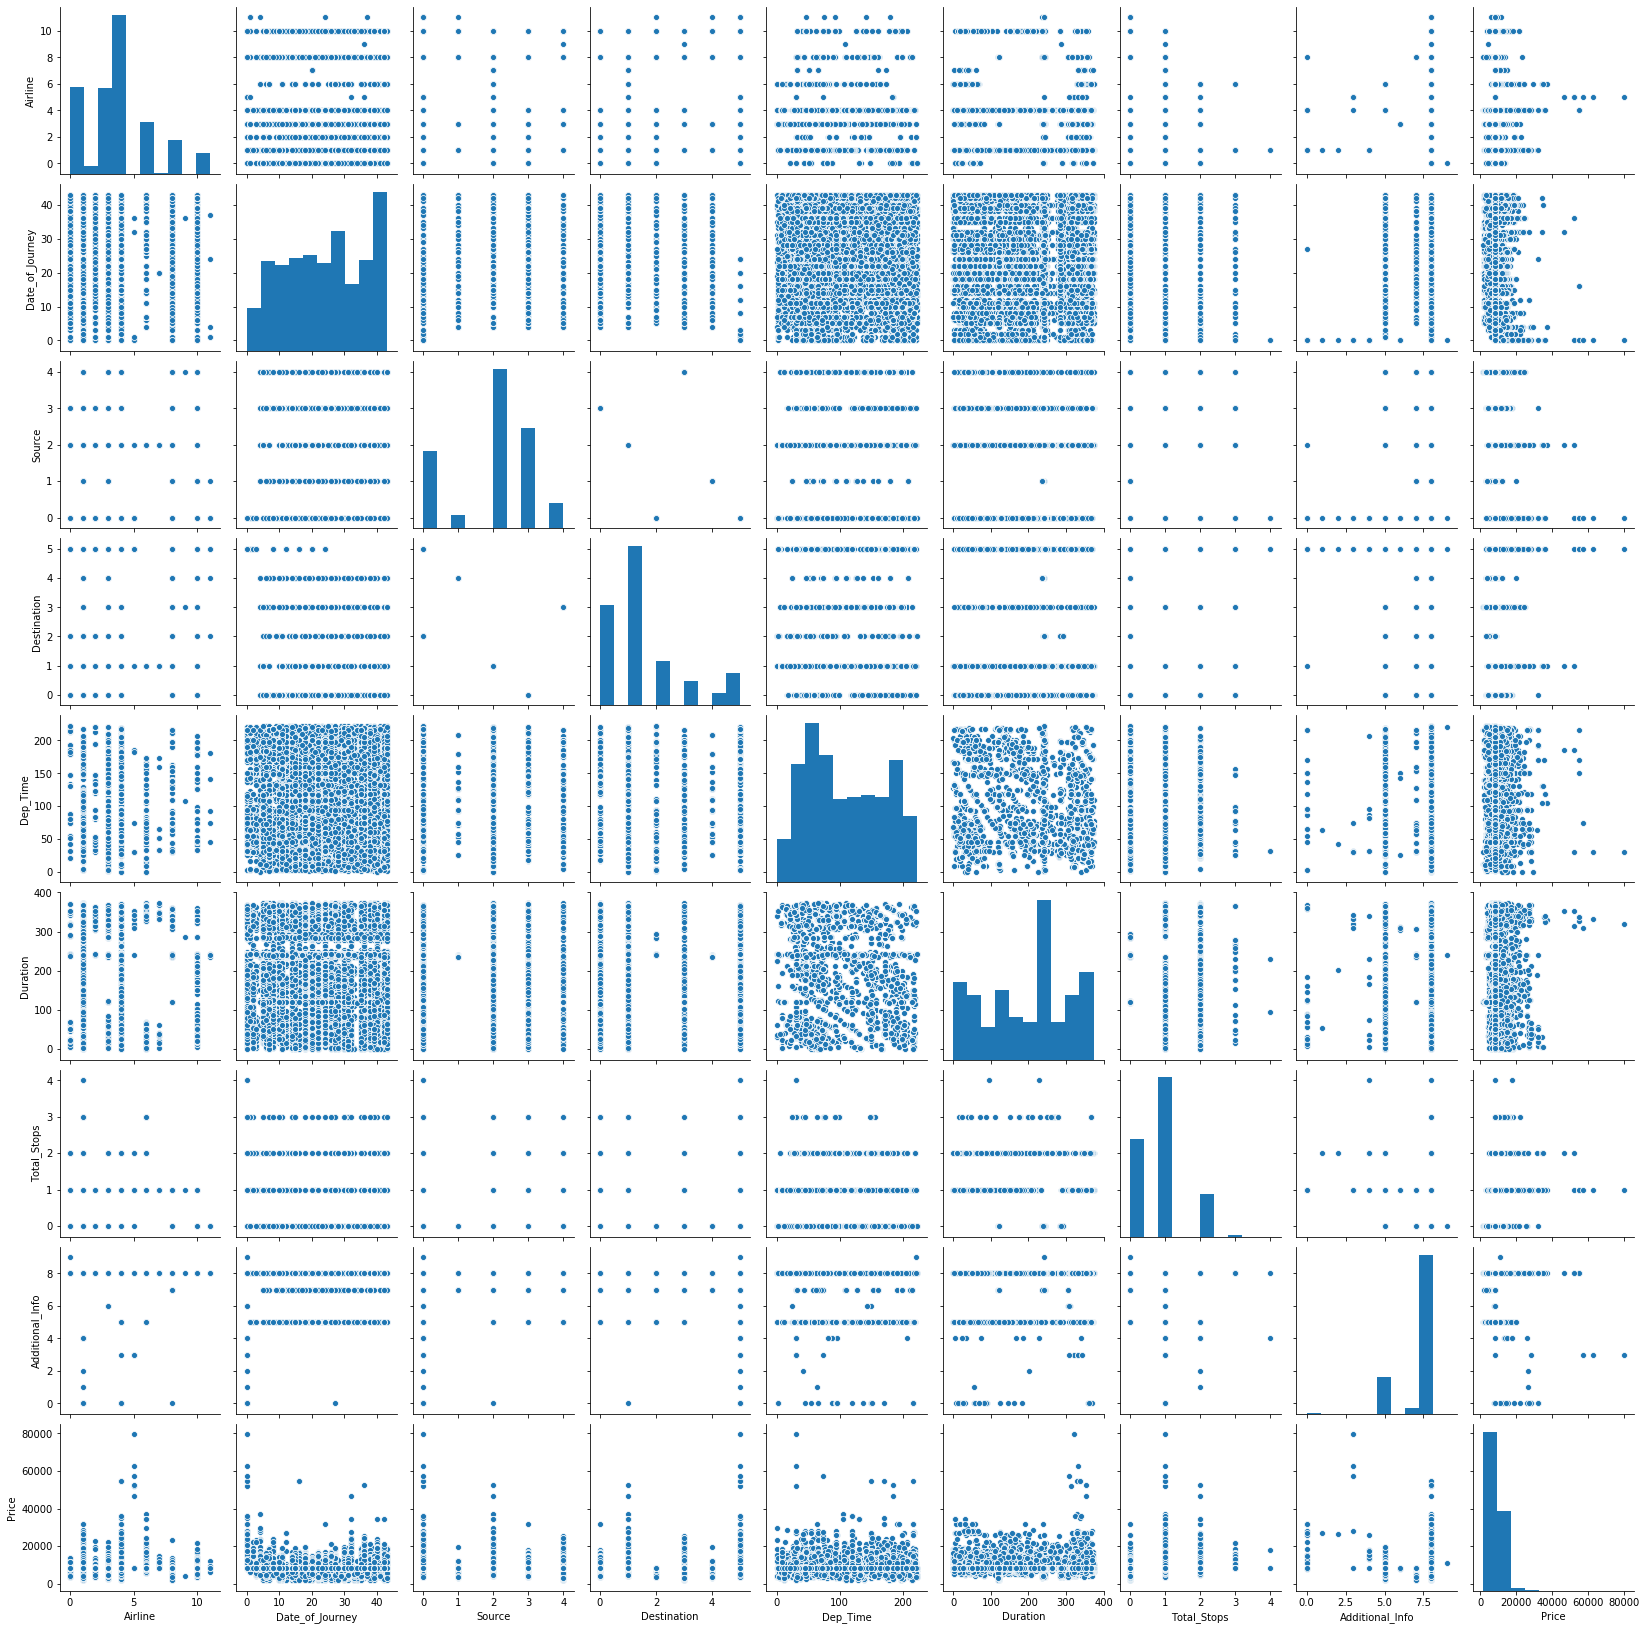

In [381]:
sns.pairplot(fd)

# Removing the skewness and outliers from the data set

In [382]:
fd.skew()

Airline            0.720924
Date_of_Journey   -0.065428
Source            -0.424151
Destination        1.247893
Dep_Time           0.193459
Duration          -0.192160
Total_Stops        0.317797
Additional_Info   -1.784752
Price              2.114728
dtype: float64

In [383]:
for i in fd.columns:
    if fd.skew().loc[i]>0.55:
        fd[i]=np.log1p(fd[i])

In [384]:
from scipy.stats import zscore 
z=np.abs(zscore(fd))
z

array([[0.1748634 , 0.0225739 , 1.65803232, ..., 1.22452623, 0.49422803,
        1.58775329],
       [1.47968414, 1.43176367, 0.88743964, ..., 1.74026813, 0.49422803,
        0.11710793],
       [0.24519505, 1.557708  , 0.03894899, ..., 1.74026813, 0.49422803,
        1.17582932],
       ...,
       [0.24519505, 0.99213228, 0.03894899, ..., 0.25787095, 0.49422803,
        0.07567837],
       [1.47968414, 0.99213228, 0.03894899, ..., 0.25787095, 0.49422803,
        0.07567837],
       [0.87859005, 0.70459489, 0.03894899, ..., 0.25787095, 0.49422803,
        0.07567837]])

In [385]:
threshold=3
print(np.where(z>3))

(array([  228,   387,   396,   402,   655,   657,   711,   785,   919,
         964,  1011,  1043,  1218,  1472,  1478,  1513,  1580,  1590,
        1652,  1665,  1718,  1992,  2079,  2099,  2102,  2172,  2253,
        2405,  2415,  2426,  2481,  2495,  2556,  2618,  2623,  2633,
        2693,  2718,  2724,  2729,  2814,  2822,  2924,  2924,  2972,
        3032,  3111,  3157,  3220,  3317,  3358,  3496,  3505,  3550,
        3568,  3577,  3582,  3584,  3700,  3725,  3788,  3815,  3904,
        3934,  3945,  4066,  4092,  4118,  4274,  4463,  4521,  4534,
        4595,  4655,  4699,  4760,  4839,  5011,  5013,  5050,  5210,
        5261,  5327,  5332,  5358,  5372,  5372,  5439,  5446,  5628,
        5719,  5742,  5788,  5838,  5940,  5947,  5992,  5996,  6024,
        6034,  6142,  6250,  6336,  6435,  6444,  6576,  6599,  6687,
        6884,  6991,  7001,  7031,  7200,  7249,  7292,  7351,  7480,
        7519,  7586,  7617,  7724,  7752,  7823,  7841,  7876,  8153,
        8204,  8223

In [386]:
fd1=fd[(z<3).all(axis=1)]
fd1

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,1.386294,24,0,1.791759,211,242,0.0,8,8.268219
1,0.693147,6,3,0.000000,31,342,2.0,8,8.944159
2,1.609438,43,2,0.693147,70,106,2.0,8,9.538420
3,1.386294,10,3,0.000000,164,317,1.0,8,8.735364
4,1.386294,0,0,1.791759,149,309,1.0,8,9.495745
...,...,...,...,...,...,...,...,...,...
2666,0.693147,39,3,0.000000,190,168,1.0,8,9.032768
2667,1.386294,28,3,0.000000,122,239,0.0,8,9.032768
2668,1.609438,36,2,0.693147,205,332,1.0,8,9.032768
2669,0.693147,36,2,0.693147,16,62,1.0,8,9.032768


In [387]:
fd1.skew()

Airline           -0.689700
Date_of_Journey   -0.061957
Source            -0.438462
Destination        0.295413
Dep_Time           0.189149
Duration          -0.202090
Total_Stops        0.211310
Additional_Info   -1.567639
Price             -0.328835
dtype: float64

In [388]:
x=fd1.iloc[:,0:-1]
x.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info
0,1.386294,24,0,1.791759,211,242,0.0,8
1,0.693147,6,3,0.000000,31,342,2.0,8
2,1.609438,43,2,0.693147,70,106,2.0,8
3,1.386294,10,3,0.000000,164,317,1.0,8
4,1.386294,0,0,1.791759,149,309,1.0,8


In [389]:
y=fd1['Price']
y.head()

0    8.268219
1    8.944159
2    9.538420
3    8.735364
4    9.495745
Name: Price, dtype: float64

In [390]:
# Training the model withh x train , y train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(10544, 8) (2636, 8)
(10544,) (2636,)


In [391]:
# fitting the model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [392]:
lr.coef_

array([ 1.14103705e-01, -1.04589550e-03, -4.71175317e-02, -6.07632642e-02,
        3.54947770e-04, -2.59186693e-04,  4.28166871e-01,  6.23543877e-03])

In [393]:
lr.intercept_

8.60754790111141

In [394]:
lr.score(x_train,y_train)

0.4203209627058013

In [395]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state)
    lr.fit(x_train,y_train)
    pre=lr.predict(x_test)
    r2_scr=r2_score(y_test,pre)
    print('R2 Score is cooresponding to',r_state,'is :',r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
print()
print('Max R2 is Cooresponding to',final_r_state,'is:',max_r_score)

R2 Score is cooresponding to 42 is : 0.4330623380422237
R2 Score is cooresponding to 43 is : 0.4296239360648194
R2 Score is cooresponding to 44 is : 0.41748065423348557
R2 Score is cooresponding to 45 is : 0.4123110295094806
R2 Score is cooresponding to 46 is : 0.41488874271068776
R2 Score is cooresponding to 47 is : 0.45289942721439835
R2 Score is cooresponding to 48 is : 0.4269261063234808
R2 Score is cooresponding to 49 is : 0.42388955698695896
R2 Score is cooresponding to 50 is : 0.4236930986713977
R2 Score is cooresponding to 51 is : 0.43676947814891665
R2 Score is cooresponding to 52 is : 0.43089571890550493
R2 Score is cooresponding to 53 is : 0.40581663054006556
R2 Score is cooresponding to 54 is : 0.42032366132703924
R2 Score is cooresponding to 55 is : 0.4162618821970545
R2 Score is cooresponding to 56 is : 0.42503545663057374
R2 Score is cooresponding to 57 is : 0.4159875993349562
R2 Score is cooresponding to 58 is : 0.41359550876534334
R2 Score is cooresponding to 59 is : 0

In [396]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [397]:
lgr=LinearRegression()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
abr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()
knr=KNeighborsRegressor()
models=[]
models.append(('LinearRegression',lgr))
models.append(('DecisionTreeRegressor',dtr))
models.append(('RandomForestRegressor',rfr))
models.append(('AdaBoostRegressor',abr))
models.append(('GradientBoostingRegressor',gbr))
models.append(('KNeighborsRegressor',knr))

In [400]:
Model=[]
r2score=[]
RMSE=[]
CVS=[]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=66)
for i,model in models:
    print('***************',i,'****************','\n')
    Model.append(i)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2s=r2_score(y_test,pre)
    print('R2 Score is ',r2s,'\n')
    r2score.append(r2s*100)
    rmse=np.sqrt(mean_squared_error(y_test,pre))
    print('RMSE is ',rmse,'\n')
    RMSE.append(rmse)
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('Cross Validation Score is ',sc,'\n')
    CVS.append(sc*100)

*************** LinearRegression **************** 

R2 Score is  0.45533722309290825 

RMSE is  0.3324957225731378 

Cross Validation Score is  -8.188402284446442e+27 

*************** DecisionTreeRegressor **************** 

R2 Score is  0.4565993374056839 

RMSE is  0.33211026296737745 

Cross Validation Score is  -1.6956271677745994e+28 

*************** RandomForestRegressor **************** 

R2 Score is  0.6793196438330082 

RMSE is  0.25512815789733184 

Cross Validation Score is  -1.5588760803792156e+28 

*************** AdaBoostRegressor **************** 

R2 Score is  0.5317542882169755 

RMSE is  0.30828977378020256 

Cross Validation Score is  -6.594397495424816e+27 

*************** GradientBoostingRegressor **************** 

R2 Score is  0.6734121885273514 

RMSE is  0.2574673724598352 

Cross Validation Score is  -1.2846731631116074e+28 

*************** KNeighborsRegressor **************** 

R2 Score is  0.5244352792405267 

RMSE is  0.310689824250578 

Cross Validatio

In [401]:
result=pd.DataFrame({'Model':Model,'R2_Score':r2score,'RMSE':RMSE,'CVS':CVS})
result

,Model,R2_Score,RMSE,CVS
0,LinearRegression,45.533722,0.332496,-8.188402e+29
1,DecisionTreeRegressor,45.659934,0.332110,-1.695627e+30
2,RandomForestRegressor,67.931964,0.255128,-1.558876e+30
3,AdaBoostRegressor,53.175429,0.308290,-6.594397e+29
4,GradientBoostingRegressor,67.341219,0.257467,-1.284673e+30
5,KNeighborsRegressor,52.443528,0.310690,-1.183507e+30


In [402]:
from sklearn.externals import joblib
joblib.dump(rfr,'Flightdata.pkl')

['Flightdata.pkl']